In [61]:
# Task 2: Customer Segmentation Using Unsupervised Learning 
# Objective 

# Segment mall customers into distinct groups based on spending behavior and demographic attributes to enable targeted marketing strategies. 
# Dataset 

#   - Source: Mall Customers Dataset (Kaggle) 
#   - Rows: 200
#   - Features: 5 (CustomerID, Gender, Age, Annual Income, Spending Score)
#   - Key Variables: Annual Income (k$) and Spending Score (1-100) used for clustering
#   - No target variable — unsupervised task
     

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Silhouette score for evaluating clustering quality
from sklearn.metrics import silhouette_score

In [17]:
# Load dataset (update path if needed)
df = pd.read_csv("/home/umer/Downloads/Mall_Customers.csv")

# Display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
# Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
# Rename columns for easier access
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

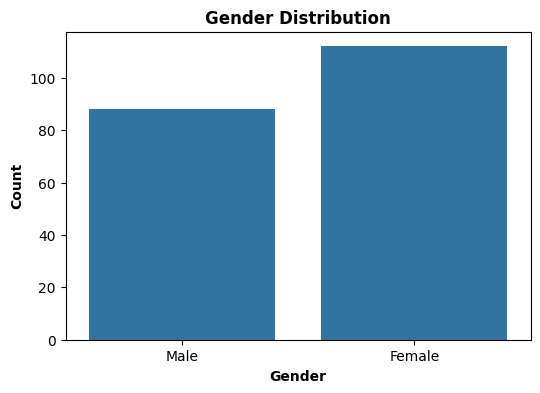

In [24]:
# Distribution of Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

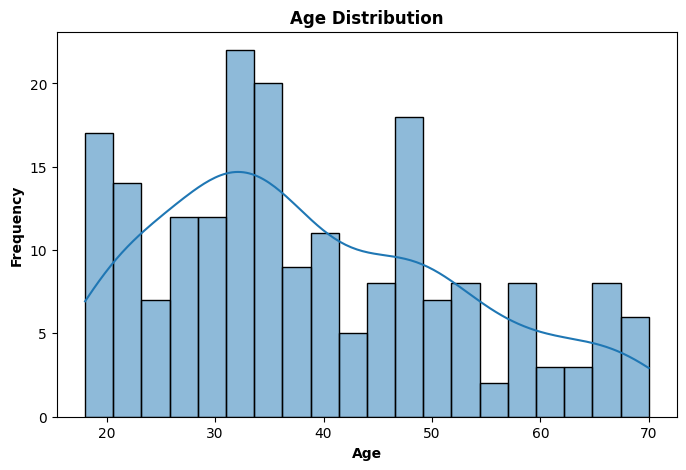

In [25]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()


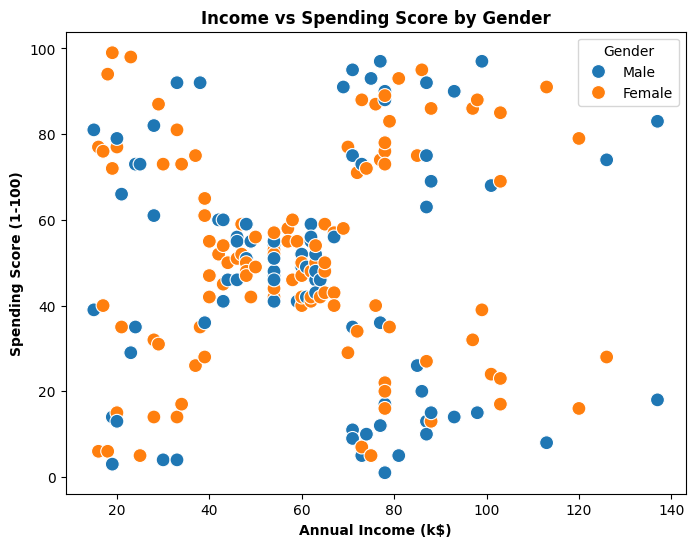

In [29]:
# Income vs Spending Score (Scatter plot - most important for clustering)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Gender', s=100)
plt.title('Income vs Spending Score by Gender', fontweight='bold')
plt.xlabel('Annual Income (k$)', fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontweight='bold')
plt.legend(title='Gender')
plt.show()

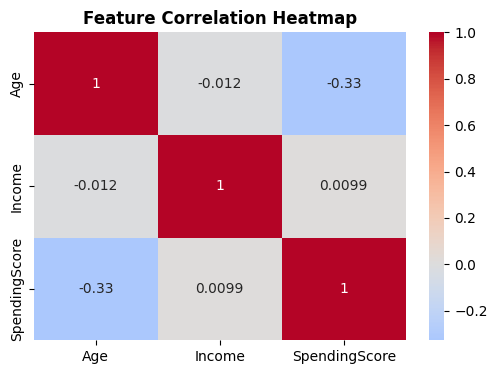

In [32]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Income', 'SpendingScore']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontweight='bold')
plt.show()

In [37]:
# Prepare data for clustering
X = df[['Income', 'SpendingScore']].values

# Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

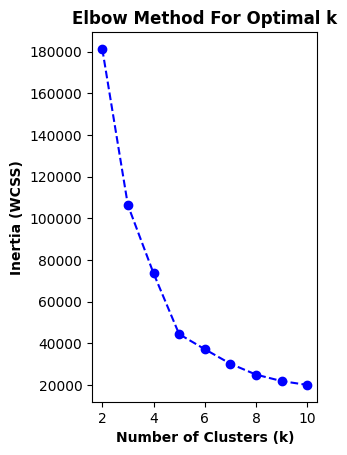

In [40]:
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k', fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontweight='bold')
plt.ylabel('Inertia (WCSS)', fontweight='bold')
plt.show()

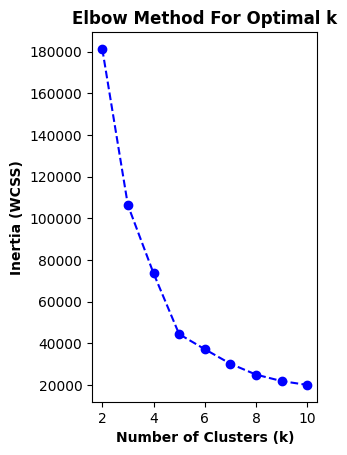

In [41]:
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k', fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontweight='bold')
plt.ylabel('Inertia (WCSS)', fontweight='bold')
plt.show()

In [42]:
# Final K-Means model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [43]:
# Display cluster centers
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: Income = {center[0]:.1f}, SpendingScore = {center[1]:.1f}")

Cluster 0: Income = 55.3, SpendingScore = 49.5
Cluster 1: Income = 86.5, SpendingScore = 82.1
Cluster 2: Income = 25.7, SpendingScore = 79.4
Cluster 3: Income = 88.2, SpendingScore = 17.1
Cluster 4: Income = 26.3, SpendingScore = 20.9


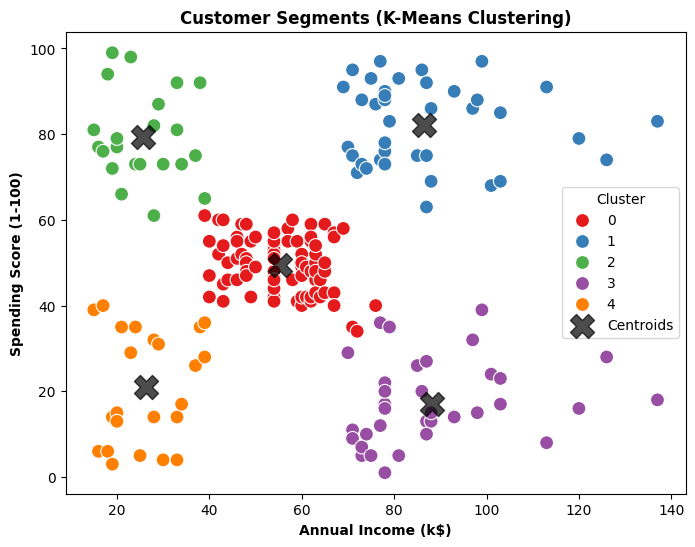

In [45]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', palette='Set1', s=100, legend='full')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=300, alpha=0.7, marker='X', label='Centroids')
plt.title('Customer Segments (K-Means Clustering)', fontweight='bold')
plt.xlabel('Annual Income (k$)', fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontweight='bold')
plt.legend(title='Cluster')
plt.show()

In [46]:
# Add Age to features
X_3d = df[['Age', 'Income', 'SpendingScore']].values

In [47]:
# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_3d)

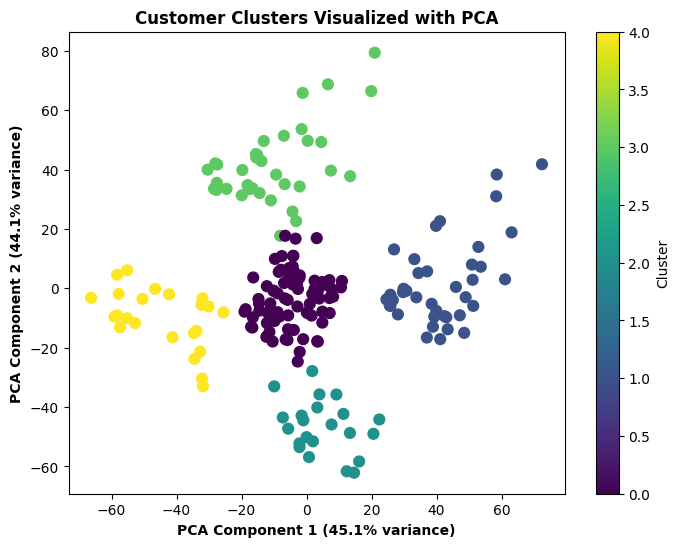

In [48]:
# Plot PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], s=60)
plt.title('Customer Clusters Visualized with PCA', fontweight='bold')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [49]:
# Group by cluster to analyze characteristics
cluster_summary = df.groupby('Cluster').agg({'Age': 'mean', 'Income': 'mean', 'SpendingScore': 'mean', 'CustomerID': 'count'}).round(1).rename(columns={'CustomerID': 'Count'})

In [50]:
cluster_summary['Age'] = cluster_summary['Age'].round(0)
display(cluster_summary)

,Age,Income,SpendingScore,Count
Cluster,,,,
0,43.0,55.3,49.5,81
1,33.0,86.5,82.1,39
2,25.0,25.7,79.4,22
3,41.0,88.2,17.1,35
4,45.0,26.3,20.9,23


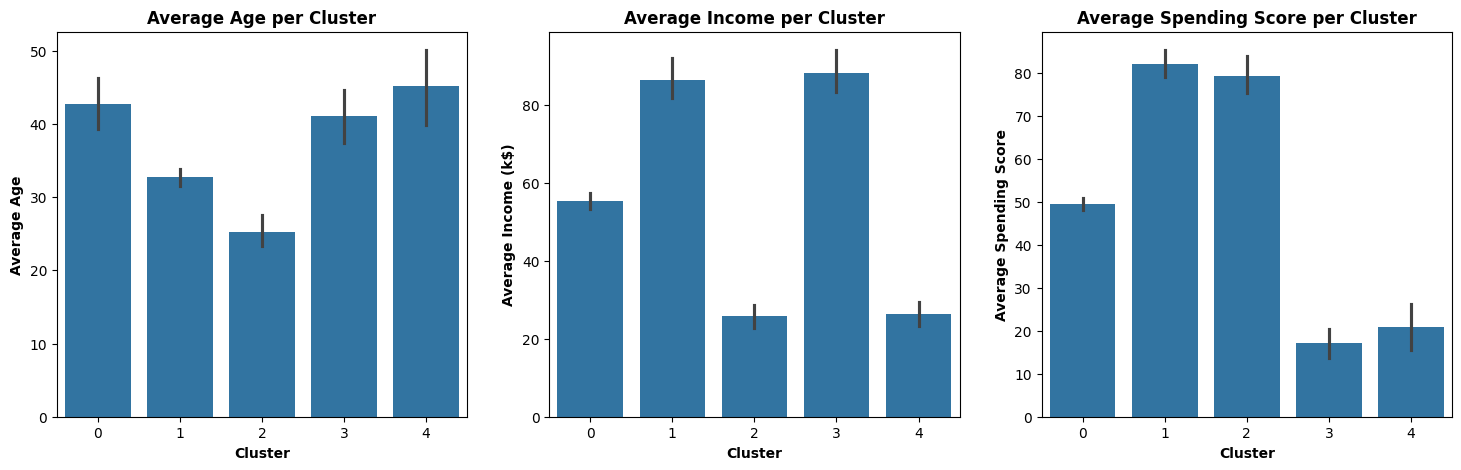

In [59]:
# Visualize cluster profiles
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age by Cluster
sns.barplot(data=df, x='Cluster', y='Age', ax=axes[0])
axes[0].set_title('Average Age per Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster', fontweight='bold')
axes[0].set_ylabel('Average Age', fontweight='bold')

# Income by Cluster
sns.barplot(data=df, x='Cluster', y='Income', ax=axes[1])
axes[1].set_title('Average Income per Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster', fontweight='bold')
axes[1].set_ylabel('Average Income (k$)', fontweight='bold')

# Spending Score by Cluster
sns.barplot(data=df, x='Cluster', y='SpendingScore', ax=axes[2])
axes[2].set_title('Average Spending Score per Cluster', fontweight='bold')
axes[2].set_xlabel('Cluster', fontweight='bold')
axes[2].set_ylabel('Average Spending Score', fontweight='bold')
plt.show()

In [60]:
####### FINAL CONCLUSION & BUSINESS INSIGHTS 

# This project segmented 200 mall customers into 5 distinct groups using K-Means clustering based on income and spending behavior. 

# Key Results: 

#     Optimal clusters: 5 (confirmed via Elbow Method and Silhouette Score).
#     Clear separation between high-value, average, and budget-conscious customers.
     

# Key Insights: 

#     High-income, low-spending customers need urgency or exclusivity to convert.
#     Low-income, high-spending customers (likely young) respond well to trends and social media.
#     High-income, high-spending customers are VIPs — prioritize retention and personalization.
#     Low-income, low-spending group requires deep discounts or referral incentives.
#     Medium group is the largest — ideal for loyalty programs and broad campaigns.
     

# Recommendations: 

#     Customize marketing per segment.
#     Adjust inventory and promotions to match cluster profiles.
#     Test campaigns per segment and measure ROI.
     

# Business Impact:
# Enables targeted marketing, improves customer experience, and increases sales efficiency by focusing resources on the right groups.